In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

From Dec23 to Feb24 there are 13 weeks.  
six days each week means 78 days.  
5 hours each day means 390 hours.

In [2]:
df = {
    'date':  ['01/12', '02/12', '03/12', '04/12', '05/12', '06/12', '07/12', '08/12', '09/12', '10/12', '11/12', '12/12', '13/12', '14/12', '15/12', '16/12', '17/12', '18/12', '19/12', '20/12', '21/12', '22/12', '23/12', '24/12', '25/12', '26/12' , '27/12', '28/12', '29/12', '30/12', '31/12', '1/1', '2/1', '3/1', '4/1', '5/1', '6/1', '7/1'],
    'hours': [2.0    , 2.5    , 2.0    , 3.5    , 3.5    , 2.0    , 5.0    , 3.0    , 1.5    , 2.0    , 1.5    , 2.5    , 3.5    , 2      , 3.5    , 2.5    , 2      , 3      , 2.5    , 1      , 0      , 3      , 3.5    , 3.5    , 3.5    , 1.5     , 0      , 0      , 2      , 4      ,  4.5   , 3    , 2    , 3    , 3    , 2    , 3.5  , 4.5  ],
    'day':   ['fri'  , 'sat'  , 'sun'  , 'mon'  , 'tue'  , 'wed'  , 'thr'  , 'fri'  , 'sat'  , 'sun'  , 'mon'  , 'tue'  , 'wed'  , 'thr'  , 'fri'  , 'sat'  , 'sun'  , 'mon'  , 'tue'  , 'wed'  , 'thr'  , 'fri'  , 'sat'  , 'sun'  , 'mon'  , 'tue'   , 'wed'  , 'thr'  , 'fri'  , 'sat'  , 'sun'  , 'mon', 'tue', 'wed', 'thr', 'fri', 'sat', 'sun'],
    'week':  [1      , 1      , 1      , 1      , 1      , 1      , 1      , 2      , 2      , 2      , 2      , 2      , 2      , 2      , 3      , 3      , 3      , 3      , 3      , 3      , 3      , 4      , 4      , 4      , 4      , 4       , 4      , 4      , 5      , 5      , 5      , 5    , 5    , 5    , 5    , 6    , 6    , 6    ]
}

In [3]:
df = pd.DataFrame(df)

In [4]:
print(df['hours'].mean())
df['hours'].sum()

2.5657894736842106


97.5

In [5]:
df.groupby('week').agg({'hours': ['sum','mean']})

hours          
       sum      mean
week                
1     20.5  2.928571
2     16.0  2.285714
3     14.5  2.071429
4     15.0  2.142857
5     21.5  3.071429
6     10.0  3.333333

In [6]:
df.groupby('day', sort = False).agg({'hours': 'mean'})

,hours
day,
fri,2.583333
sat,2.916667
sun,3.083333
mon,2.900000
tue,2.400000
wed,1.900000
thr,2.000000


<Axes: xlabel='date', ylabel='hours'>

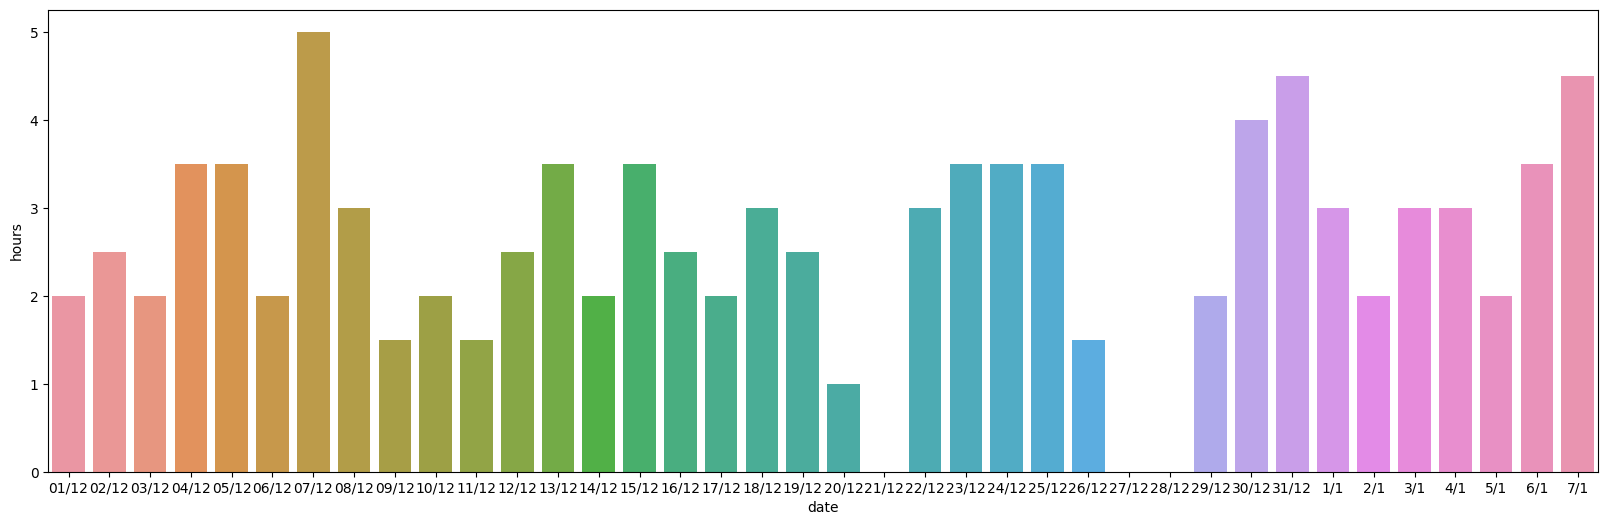

In [7]:
plt.figure(figsize=(20,6))
sns.barplot(x = df['date'], y = df['hours'])

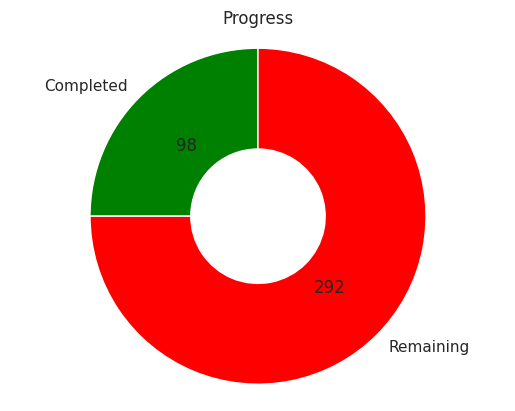

In [8]:
completed = df['hours'].sum()
remaining = 390 - completed

# Seaborn style settings (optional but can enhance aesthetics)
sns.set(style="whitegrid")

# Data for the donut chart
sizes = [completed, remaining]
labels = ['Completed', 'Remaining']
colors = ['green', 'red']  # Specify colors for completed and remaining portions

# Create a donut chart using Matplotlib's plt.pie()
plt.pie(sizes, labels=labels, autopct=lambda p: '{:.0f}'.format(p * sum(sizes) / 100), startangle=90, wedgeprops=dict(width=0.6), colors=colors)

# Draw a circle in the center to create the hole
centre_circle = plt.Circle((0, 0), 0.3, color='white', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title to represent the task
plt.title('Progress')

# Show the plot
plt.show()

In [9]:
df['cumulative_hours'] = df['hours'].expanding().mean()

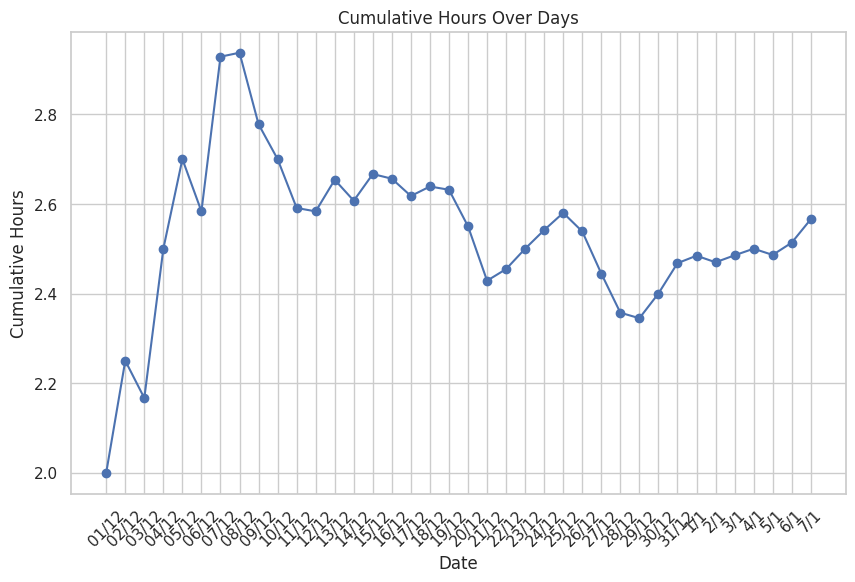

In [10]:
# Plotting the cumulative_hours column
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['cumulative_hours'], marker='o', linestyle='-', color='b')
plt.title('Cumulative Hours Over Days')
plt.xlabel('Date')
plt.ylabel('Cumulative Hours')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()